In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Housing_Prices4")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 21609 non-null  int64  
 1   ID                                         21609 non-null  int64  
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  int64  
 10  Condition of the House

In [4]:
data['Sale Price'].corr(data['Flat Area (in Sqft)'])

0.6951704258420669

In [5]:
np.corrcoef(data['Sale Price'],data['Flat Area (in Sqft)'])

array([[1.        , 0.69517043],
       [0.69517043, 1.        ]])

In [6]:
data.drop(columns=['Unnamed: 0','ID'],inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

In [8]:
data["Condition of the House"].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

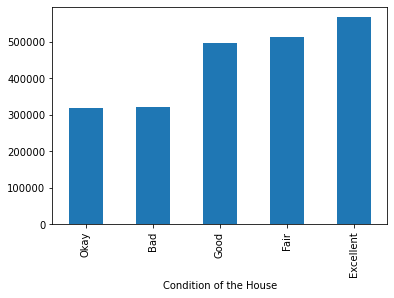

In [9]:
data.groupby(data['Condition of the House'])['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Zipcode'>

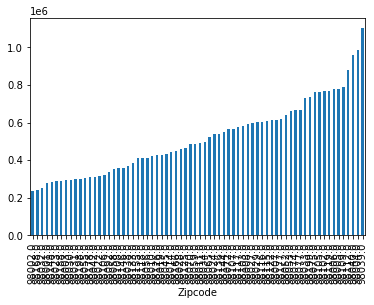

In [10]:
data.groupby(data['Zipcode'])['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Waterfront View'>

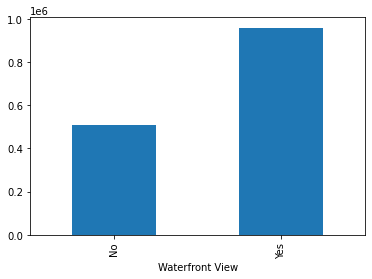

In [11]:
data.groupby(data['Waterfront View'])['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='ever renovated'>

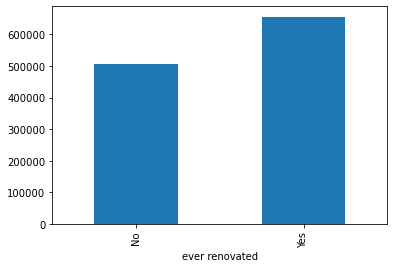

In [12]:
data.groupby(data['ever renovated'])['Sale Price'].mean().sort_values().plot(kind='bar')

In [13]:
data.rename(columns={'Sale Price':'Sale_Price','Waterfront View':'Waterfront_View','Condition of the House':'Condition_of_the_House','ever renovated':'ever_renovated'},inplace=True)

In [14]:
data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,Renovation_Years
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,No,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,8,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,No,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,No,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,No,0


In [15]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [16]:
mod=ols('Sale_Price~Condition_of_the_House',data= data).fit()
Anova_table=sm.stats.anova_lm(mod,type=2)
Anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Condition_of_the_House,4.0,1.441831e+13,3.604579e+12,58.25563,5.447605e-49
Residual,21604.0,1.336752e+15,6.187520e+10,NaN,NaN


In [17]:
mod=ols('Sale_Price~ever_renovated',data= data).fit()
Anova_table=sm.stats.anova_lm(mod,type=2)
Anova_table

,df,sum_sq,mean_sq,F,PR(>F)
ever_renovated,1.0,1.998463e+13,1.998463e+13,324.378469,5.419055e-72
Residual,21607.0,1.331185e+15,6.160899e+10,NaN,NaN


In [18]:
mod=ols('Sale_Price~Waterfront_View',data= data).fit()
Anova_table=sm.stats.anova_lm(mod,type=2)
Anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Waterfront_View,1.0,3.283737e+13,3.283737e+13,538.192683,1.275558e-117
Residual,21607.0,1.318333e+15,6.101415e+10,NaN,NaN


In [19]:
mod=ols('Sale_Price~Condition_of_the_House',data= data).fit()
Anova_table=sm.stats.anova_lm(mod,type=2)
Anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Condition_of_the_House,4.0,1.441831e+13,3.604579e+12,58.25563,5.447605e-49
Residual,21604.0,1.336752e+15,6.187520e+10,NaN,NaN


In [20]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,Renovation_Years
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [21]:
data=pd.get_dummies(data,columns=['Condition_of_the_House','ever_renovated','Waterfront_View'],drop_first=True)

In [22]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Renovation_Years,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,ever_renovated_Yes,Waterfront_View_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,0,1,0,0,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


In [23]:
Zip_table=data.groupby("Zipcode").agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)

In [24]:
Zip_table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [25]:
Zip_table["Zipcode_Group"]=pd.cut(Zip_table["Sale_Price"],bins=10,labels=['Zipcode_Group_0','Zipcode_Group_1','Zipcode_Group_2',
                                                                           'Zipcode_Group_3','Zipcode_Group_4',
                                                                           'Zipcode_Group_5','Zipcode_Group_6',
                                                                           'Zipcode_Group_7','Zipcode_Group_8',
                                                                           'Zipcode_Group_9'],
                                   include_lowest=True)

In [26]:
Zip_table=Zip_table.drop(columns="Sale_Price")

In [27]:
data=pd.merge(data,Zip_table,left_on="Zipcode",how='left',right_index=True)

In [28]:
data=data.drop(columns="Zipcode")

In [29]:
data.head(10)

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Renovation_Years,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,ever_renovated_Yes,Waterfront_View_Yes,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1690.0,7639,26,0,1,0,0,1,0,Zipcode_Group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group_4
5,1129575.0,4,4.50,5420.0,101930.0,1.0,0,10,3890.0,1530,...,4760.0,101930,0,0,1,0,0,0,0,Zipcode_Group_4
6,257500.0,3,2.25,1715.0,6819.0,2.0,0,7,1715.0,0,...,2238.0,6819,0,0,1,0,0,0,0,Zipcode_Group_0
7,291850.0,3,1.50,1060.0,9711.0,1.0,0,7,1060.0,0,...,1650.0,9711,0,0,1,0,0,0,0,Zipcode_Group_0
8,229500.0,3,1.00,1780.0,7470.0,1.0,0,7,1050.0,730,...,1780.0,8113,0,0,1,0,0,0,0,Zipcode_Group_1
9,323000.0,3,2.50,1890.0,6560.0,2.0,0,7,1890.0,0,...,2390.0,7570,0,0,1,0,0,0,0,Zipcode_Group_1


In [30]:
data=pd.get_dummies(data,columns=['Zipcode_Group'],drop_first=True)

In [31]:
data.head(10)

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0
5,1129575.0,4,4.50,5420.0,101930.0,1.0,0,10,3890.0,1530,...,0,0,0,0,1,0,0,0,0,0
6,257500.0,3,2.25,1715.0,6819.0,2.0,0,7,1715.0,0,...,0,0,0,0,0,0,0,0,0,0
7,291850.0,3,1.50,1060.0,9711.0,1.0,0,7,1060.0,0,...,0,0,0,0,0,0,0,0,0,0
8,229500.0,3,1.00,1780.0,7470.0,1.0,0,7,1050.0,730,...,0,1,0,0,0,0,0,0,0,0
9,323000.0,3,2.50,1890.0,6560.0,2.0,0,7,1890.0,0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
data.to_csv("transformed_Housing_Prices.csv" ,index=False)